In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [203]:
df=pd.read_csv('CU 2021 placement data.csv')

In [204]:
df.head()

,TPP ACTIVE as on 30 June 2020,UID,Current Stream,XTH\n10th %,12th%\nVerified,%,AMCAT 25.07.2020 English Comprehension(Score_5954),Quantitative Ability (Advanced)(Score_6027),Logical Ability(Score_5957),Computer Programming(Score_5),Domain Engineering(Score_3551),Automata(Score_5154),Automata Fix(Score_3308),WriteX - Essay Writing(Score),Backlog,Gender,Placed/Unplaced,Max Package student currently have
0,Active,17BCS3755,CSE-Big Data Analytics,79.8,64.4,48.7,615.0,380.0,250.0,370.0,340.0,9.0,0.0,306.0,4,Male,Unplaced,0
1,Active,17BCS3756,CSE-Big Data Analytics,93.1,88.6,78.0,615.0,640.0,660.0,625.0,580.0,52.0,0.0,648.0,0,Male,Placed,4.5
2,Active,17BCS3757,CSE-Big Data Analytics,74.0,70.6,63.1,645.0,410.0,610.0,240.0,380.0,7.0,0.0,612.0,0,Female,Unplaced,0
3,Active,17BCS3758,CSE-Big Data Analytics,95.0,80.4,81.3,805.0,710.0,680.0,670.0,700.0,79.0,0.0,495.0,0,Male,Placed,6.5
4,Active,17BCS3759,CSE-Big Data Analytics,87.4,70.8,76.8,735.0,505.0,585.0,375.0,420.0,4.0,0.0,567.0,0,Female,Unplaced,0


In [205]:
df['Current Stream'].value_counts()

CSE-Big Data Analytics      175
CSE-Internet of Things      120
CSE-Cloud Computing         108
CSE-Information Security     88
CSE-Mobile Computing         51
77.9                          1
Name: Current Stream, dtype: int64

In [206]:
df['Gender'].value_counts()

Male        447
Female       95
Unplaced      1
Name: Gender, dtype: int64

In [207]:
df['Placed/Unplaced'].value_counts()

Unplaced    466
Placed       76
5.1           1
Name: Placed/Unplaced, dtype: int64

In [208]:
df['TPP ACTIVE as on 30 June 2020'].value_counts()

Active    516
No         27
Name: TPP ACTIVE as on 30 June 2020, dtype: int64

In [209]:
df['Max Package student currently have']=pd.to_numeric(df['Max Package student currently have'],errors='coerce')
df['Backlog']=pd.to_numeric(df['Backlog'],errors='coerce')

In [210]:
df['Max Package student currently have'].dtype


dtype('float64')

In [211]:
i=df[(df['Current Stream'] == '77.90')].index
df.drop(i,inplace=True)

In [212]:
i=df[(df['Gender'] == 'Unplaced')].index
df.drop(i,inplace=True)

In [213]:
df.shape

(543, 18)

In [214]:
df['Placed/Unplaced'] = np.where(df['Max Package student currently have']!=0, 'placed','Unplaced')

In [215]:
df['Placed/Unplaced'].value_counts()

placed      338
Unplaced    205
Name: Placed/Unplaced, dtype: int64

In [216]:
df.isnull().sum()

TPP ACTIVE as on 30 June 2020                          1
UID                                                    0
Current Stream                                         1
XTH\n10th %                                            1
12th%\nVerified                                        1
%                                                      1
AMCAT 25.07.2020 English Comprehension(Score_5954)    26
Quantitative Ability (Advanced)(Score_6027)           26
Logical Ability(Score_5957)                           26
Computer Programming(Score_5)                         26
Domain Engineering(Score_3551)                        26
Automata(Score_5154)                                  26
Automata Fix(Score_3308)                              26
WriteX - Essay Writing(Score)                         26
Backlog                                                1
Gender                                                 1
Placed/Unplaced                                        0
Max Package student currently h

In [217]:
df.fillna(df.mean(),inplace=True)

In [218]:
df.fillna(df.mode(),inplace=True)

In [219]:
df.dropna(inplace=True)

In [220]:
df.isnull().sum()

TPP ACTIVE as on 30 June 2020                         0
UID                                                   0
Current Stream                                        0
XTH\n10th %                                           0
12th%\nVerified                                       0
%                                                     0
AMCAT 25.07.2020 English Comprehension(Score_5954)    0
Quantitative Ability (Advanced)(Score_6027)           0
Logical Ability(Score_5957)                           0
Computer Programming(Score_5)                         0
Domain Engineering(Score_3551)                        0
Automata(Score_5154)                                  0
Automata Fix(Score_3308)                              0
WriteX - Essay Writing(Score)                         0
Backlog                                               0
Gender                                                0
Placed/Unplaced                                       0
Max Package student currently have              

In [221]:
df.shape

(542, 18)

In [222]:
df.rename({'TPP ACTIVE as on 30 June 2020':'StudentUnivStatus',
           'XTH\n10th %':'HigherStudyMarks',
           '12th%\nVerified':'SecClassMarks',
           '%':'B.Tech CGPA',
           'Placed/Unplaced':'PlacementStatus',
          'Max Package student currently have':'OfferedSalary',
          'AMCAT 25.07.2020 English Comprehension(Score_5954)':'EnglishScore',
          'Quantitative Ability (Advanced)(Score_6027)':'QuntAbility',
          'Logical Ability(Score_5957)':'LogicalAbility',
         'Computer Programming(Score_5)':'ProgrammingScore',
         'Domain Engineering(Score_3551)':'DomaninKnowledge',
          'Automata(Score_5154)':'AutomataScore',
         'WriteX - Essay Writing(Score)':'EssayWritingScore',
          'Automata Fix(Score_3308)':'AutomataFixScore'},axis=1,inplace=True)

In [223]:
df.head()

,StudentUnivStatus,UID,Current Stream,HigherStudyMarks,SecClassMarks,B.Tech CGPA,EnglishScore,QuntAbility,LogicalAbility,ProgrammingScore,DomaninKnowledge,AutomataScore,AutomataFixScore,EssayWritingScore,Backlog,Gender,PlacementStatus,OfferedSalary
0,Active,17BCS3755,CSE-Big Data Analytics,79.8,64.4,48.7,615.0,380.0,250.0,370.0,340.0,9.0,0.0,306.0,4.0,Male,Unplaced,0.0
1,Active,17BCS3756,CSE-Big Data Analytics,93.1,88.6,78.0,615.0,640.0,660.0,625.0,580.0,52.0,0.0,648.0,0.0,Male,placed,4.5
2,Active,17BCS3757,CSE-Big Data Analytics,74.0,70.6,63.1,645.0,410.0,610.0,240.0,380.0,7.0,0.0,612.0,0.0,Female,Unplaced,0.0
3,Active,17BCS3758,CSE-Big Data Analytics,95.0,80.4,81.3,805.0,710.0,680.0,670.0,700.0,79.0,0.0,495.0,0.0,Male,placed,6.5
4,Active,17BCS3759,CSE-Big Data Analytics,87.4,70.8,76.8,735.0,505.0,585.0,375.0,420.0,4.0,0.0,567.0,0.0,Female,Unplaced,0.0


In [201]:
df.drop(['StudentUnivStatus','UID'],axis=1,inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [39]:
LE=LabelEncoder()
df['Current Stream']=LE.fit_transform(df['Current Stream'])

In [42]:
df['Gender']=LE.fit_transform(df['Gender'])

In [44]:
df['PlacementStatus']=LE.fit_transform(df['PlacementStatus'])

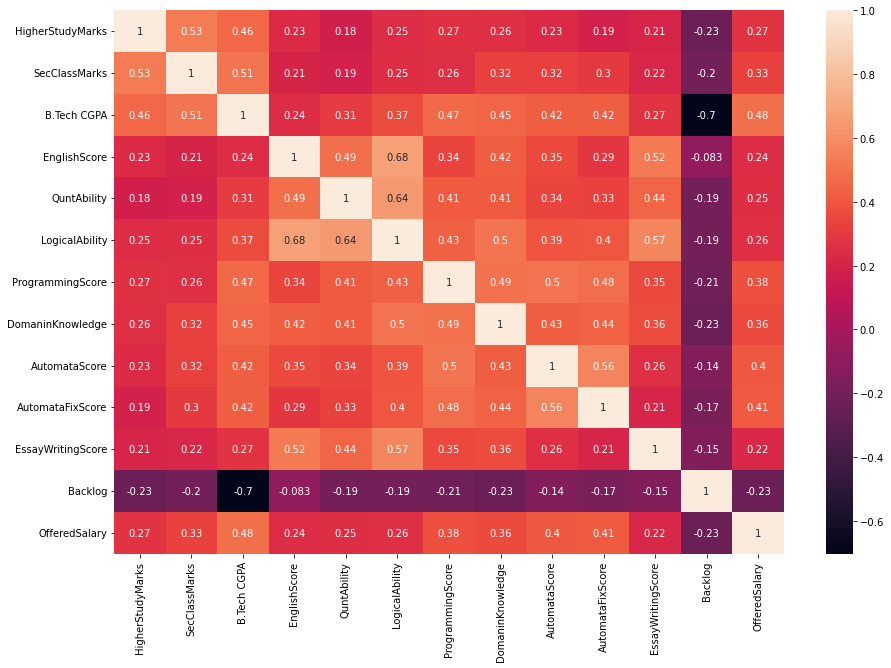

In [224]:
plt.figure(figsize=(15,10))
 
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='StudentUnivStatus', ylabel='count'>

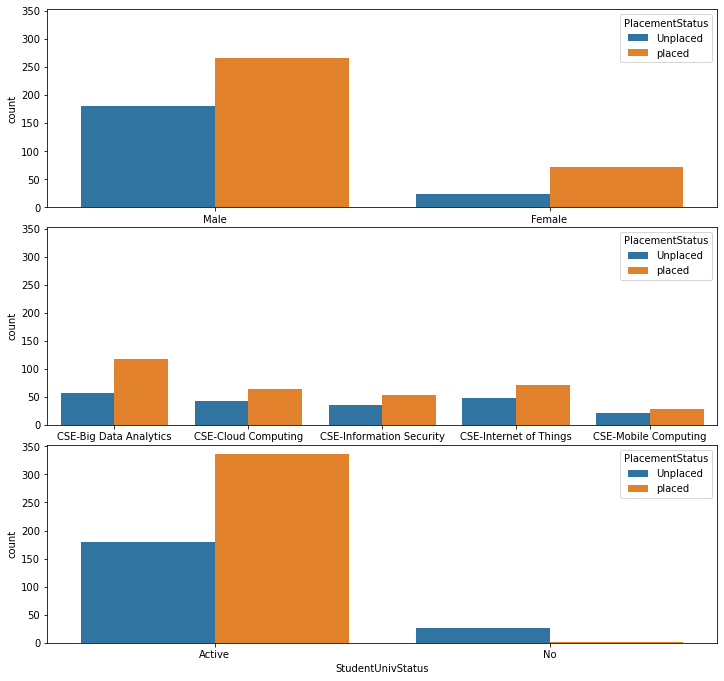

In [225]:
fig,axes=plt.subplots(3,1,figsize=(12,11),sharey=True)
plt.subplots_adjust(bottom=0, top=0.8, hspace=0.1)
sns.countplot(df.Gender,hue=df.PlacementStatus,ax=axes[0])
sns.countplot(df['Current Stream'],hue=df.PlacementStatus,ax=axes[1])
sns.countplot(df['StudentUnivStatus'],hue=df.PlacementStatus,ax=axes[2])


In [226]:
df.drop(df[df['StudentUnivStatus'] =='No'].index,axis=0,inplace=True)

In [227]:
df.shape

(515, 18)

In [228]:
df.drop('StudentUnivStatus',axis=1,inplace=True)

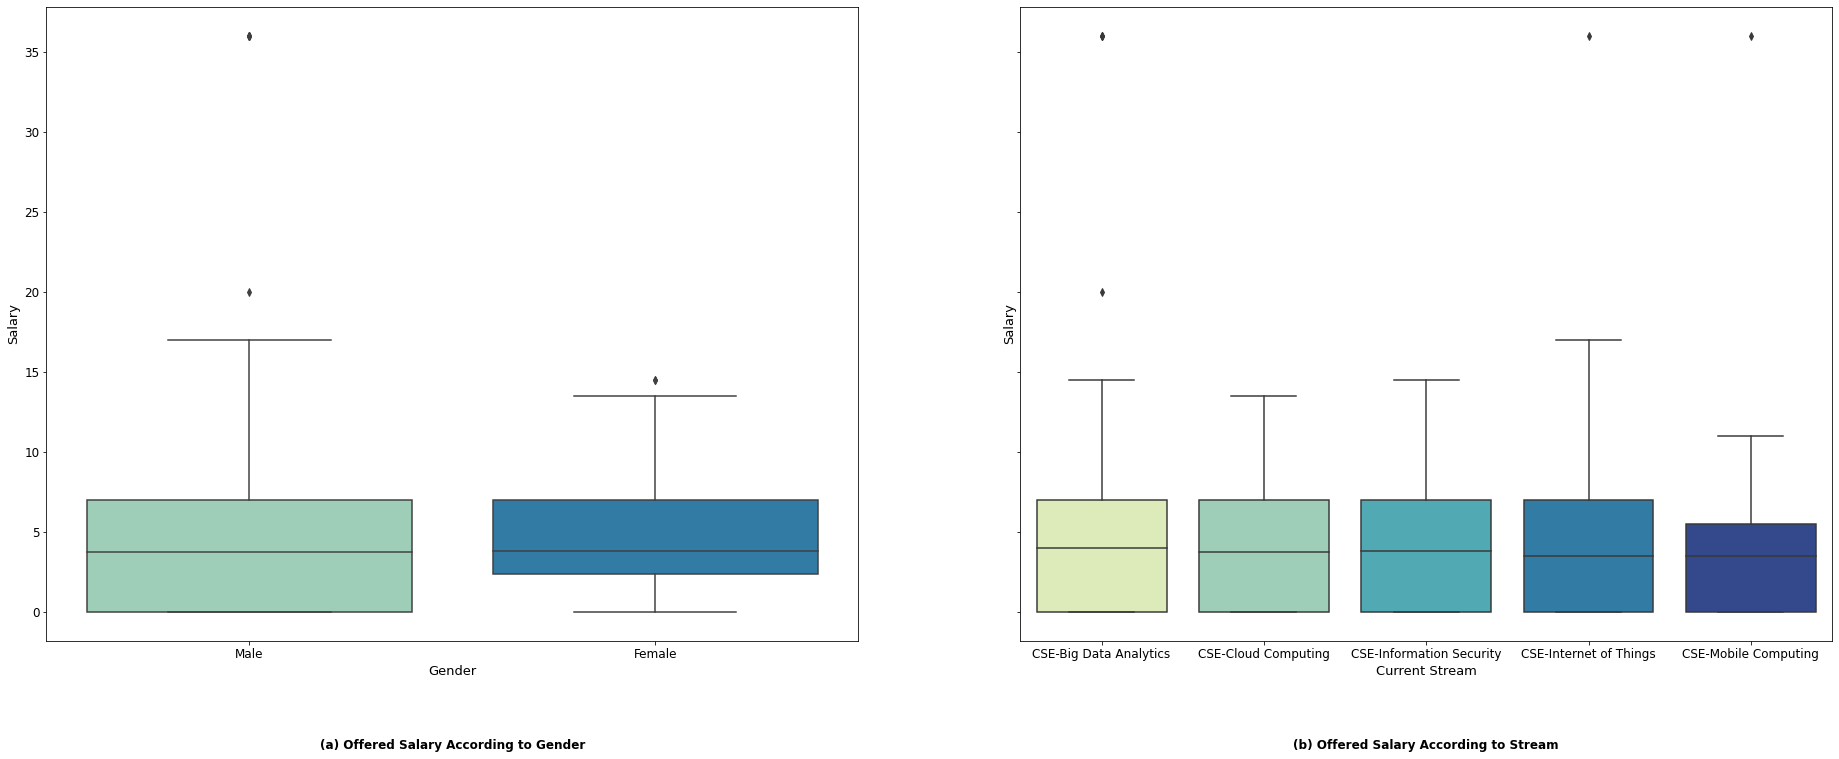

In [229]:
fig,axes=plt.subplots(1,2,figsize=(32,11),sharey=True)
plt.subplots_adjust(bottom=0, top=0.8, hspace=0.1)

sns.boxplot(y="OfferedSalary",x="Gender",data=df,ax=axes[0],palette="YlGnBu")
axes[0].set_title("(a) Offered Salary According to Gender",y=-0.18,fontweight='bold')
axes[0].set_xlabel('Gender',fontsize=13)
axes[0].set_ylabel('Salary',fontsize=13)
axes[0].tick_params(labelsize=12)

sns.boxplot(y="OfferedSalary",x="Current Stream",data=df,ax=axes[1],palette="YlGnBu")
axes[1].set_title("(b) Offered Salary According to Stream",y=-0.18,fontweight='bold')
axes[1].set_xlabel('Current Stream',fontsize=13)
axes[1].set_ylabel('Salary',fontsize=13)
axes[1].tick_params(labelsize=12)




Text(0.5, 1.0, 'Regression plot: Backlog vs Salary')

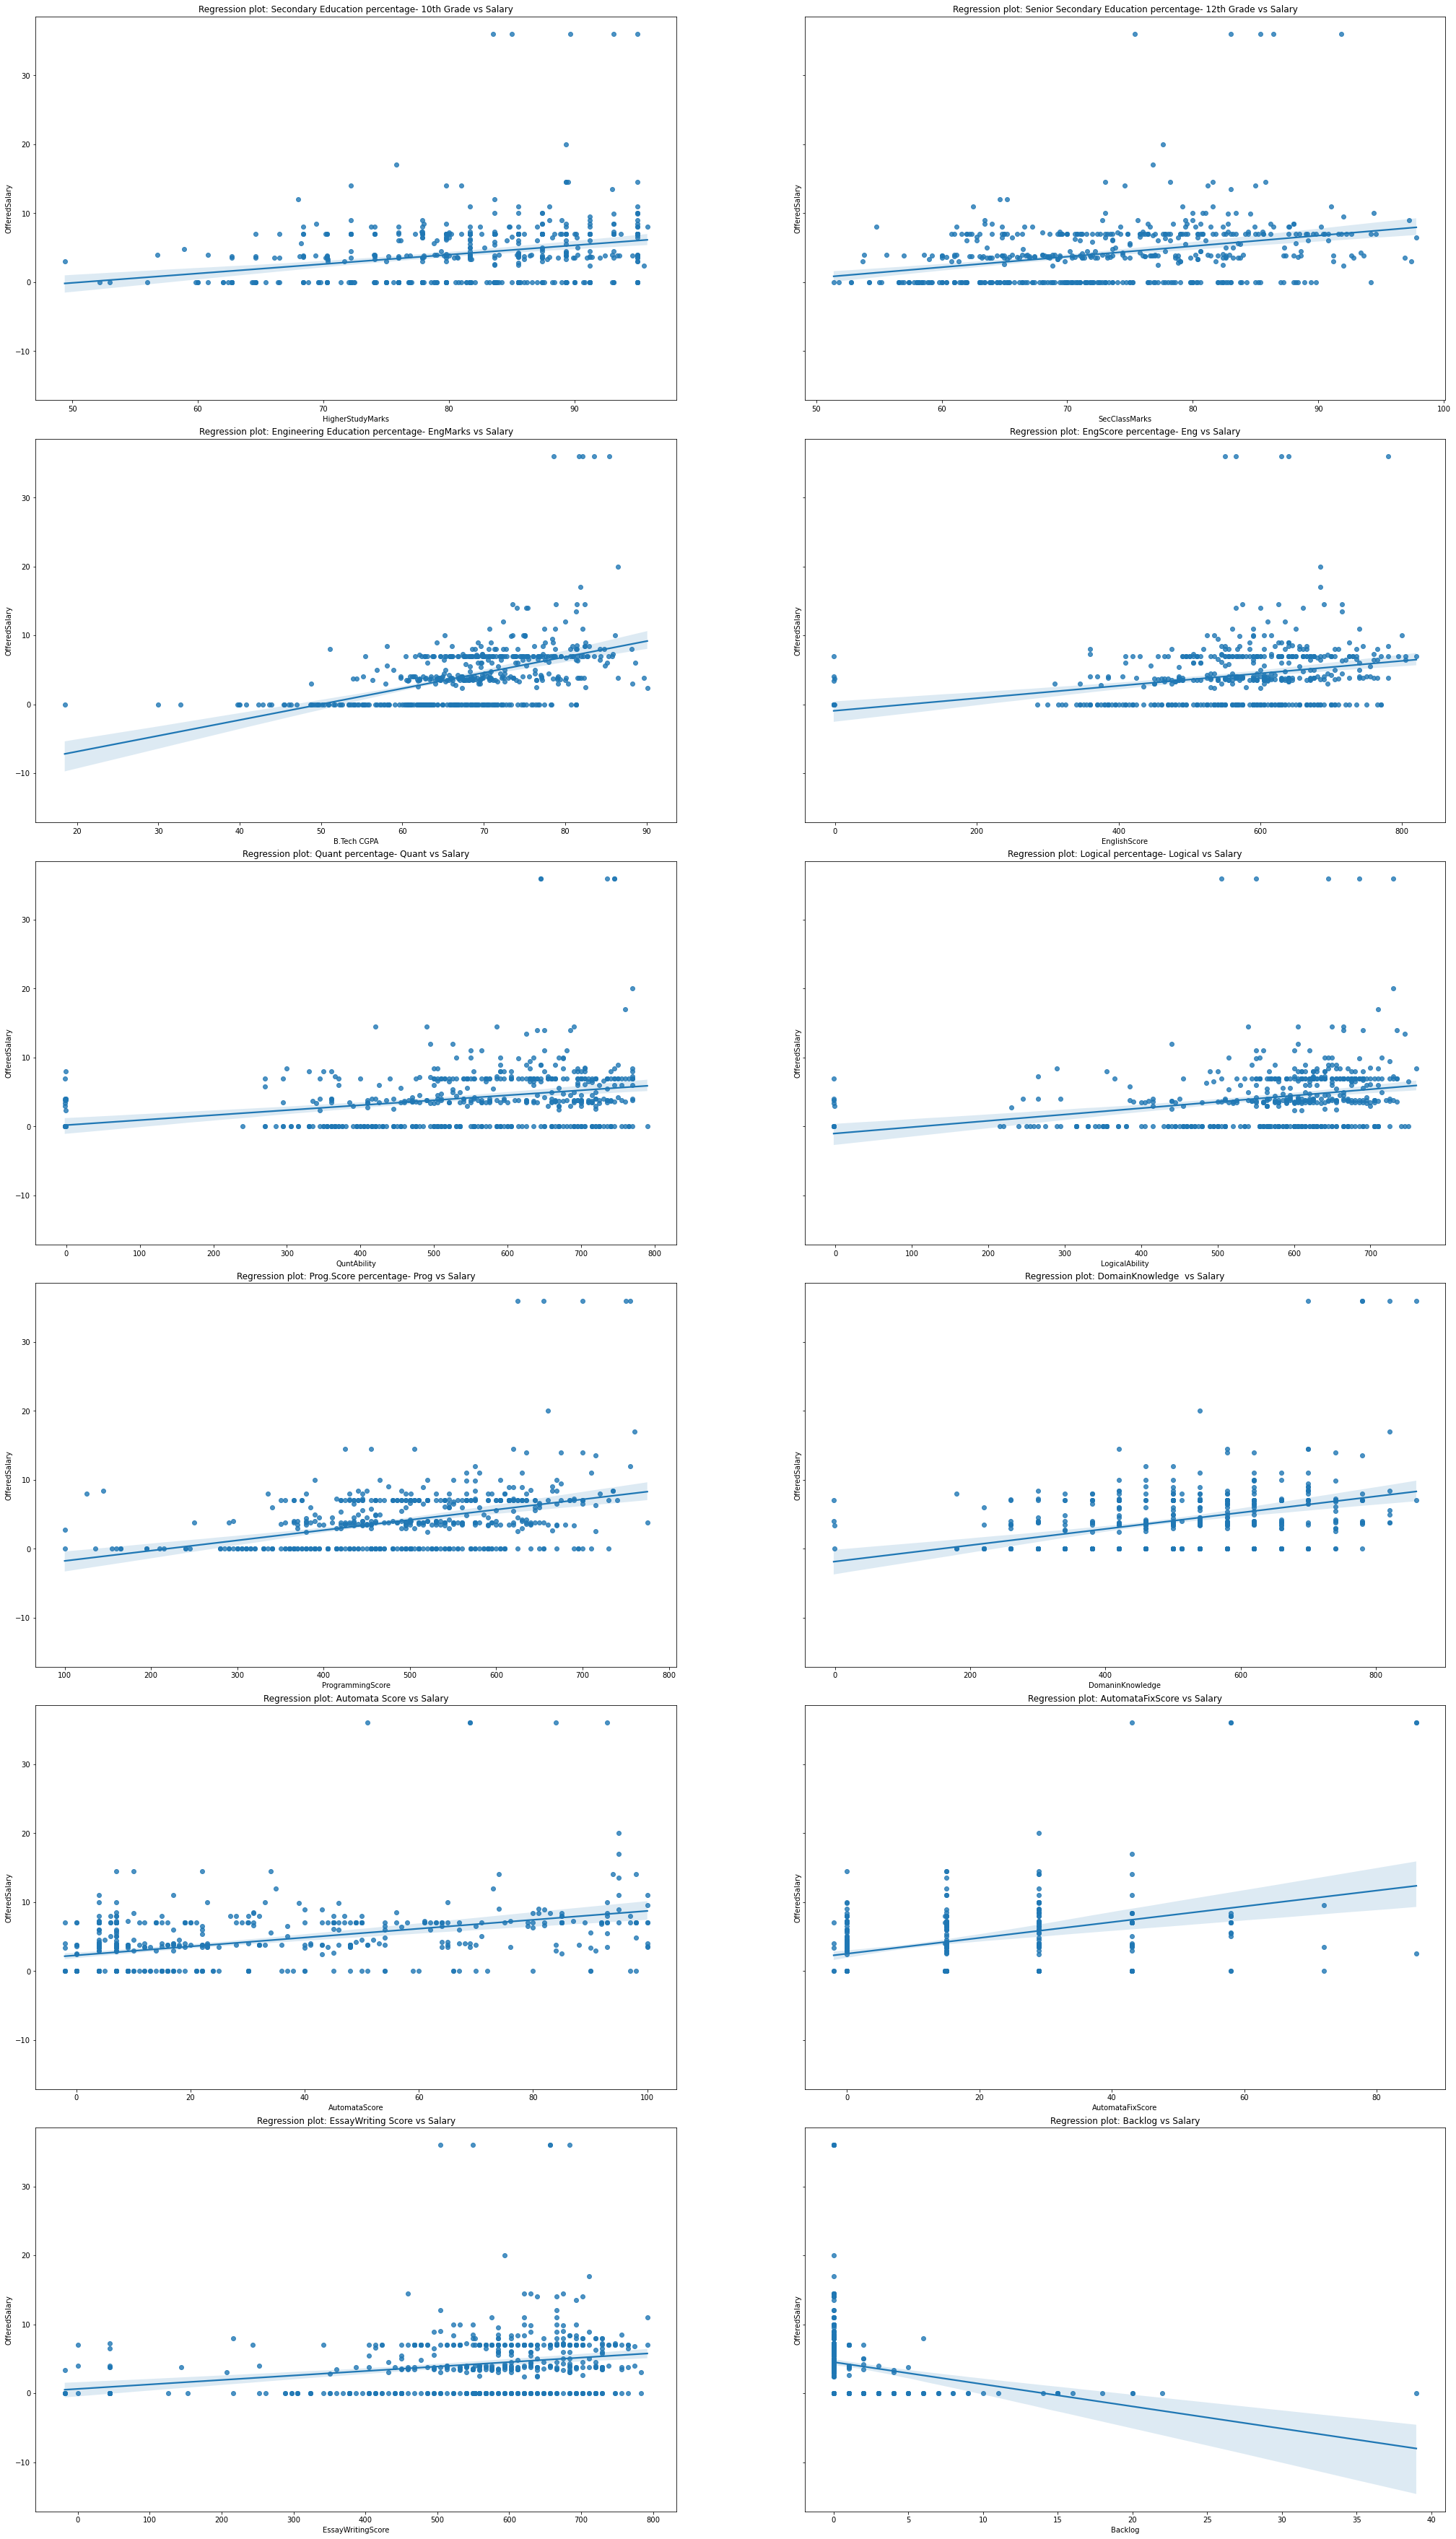

In [256]:
fig,axes=plt.subplots(6,2,figsize=(35,60),sharey=True)
plt.subplots_adjust(bottom=0, top=0.8, hspace=0.1)

sns.regplot(data = df, x ='HigherStudyMarks', y = 'OfferedSalary',ax=axes[0,0]).set_title("Regression plot: Secondary Education percentage- 10th Grade vs Salary")
sns.regplot(data = df, x ='SecClassMarks', y = 'OfferedSalary',ax=axes[0,1] ).set_title("Regression plot: Senior Secondary Education percentage- 12th Grade vs Salary")
sns.regplot(data = df, x ='B.Tech CGPA', y = 'OfferedSalary',ax=axes[1,0] ).set_title("Regression plot: Engineering Education percentage- EngMarks vs Salary")
sns.regplot(data = df, x ='EnglishScore', y = 'OfferedSalary',ax=axes[1,1] ).set_title("Regression plot: EngScore percentage- Eng vs Salary")
sns.regplot(data = df, x ='QuntAbility', y = 'OfferedSalary',ax=axes[2,0] ).set_title("Regression plot: Quant percentage- Quant vs Salary")
sns.regplot(data = df, x ='LogicalAbility', y = 'OfferedSalary',ax=axes[2,1] ).set_title("Regression plot: Logical percentage- Logical vs Salary")
sns.regplot(data = df, x ='ProgrammingScore', y = 'OfferedSalary',ax=axes[3,0] ).set_title("Regression plot: Prog.Score percentage- Prog vs Salary")
sns.regplot(data = df, x ='DomaninKnowledge', y = 'OfferedSalary',ax=axes[3,1] ).set_title("Regression plot: DomainKnowledge  vs Salary")
sns.regplot(data = df, x ='AutomataScore', y = 'OfferedSalary',ax=axes[4,0] ).set_title("Regression plot: Automata Score vs Salary")
sns.regplot(data = df, x ='AutomataFixScore', y = 'OfferedSalary',ax=axes[4,1] ).set_title("Regression plot: AutomataFixScore vs Salary")
sns.regplot(data = df, x ='EssayWritingScore', y = 'OfferedSalary',ax=axes[5,0] ).set_title("Regression plot: EssayWriting Score vs Salary")
sns.regplot(data = df, x ='Backlog', y = 'OfferedSalary',ax=axes[5,1] ).set_title("Regression plot: Backlog vs Salary")

Text(0.5, 1.0, 'Not Placed Student')

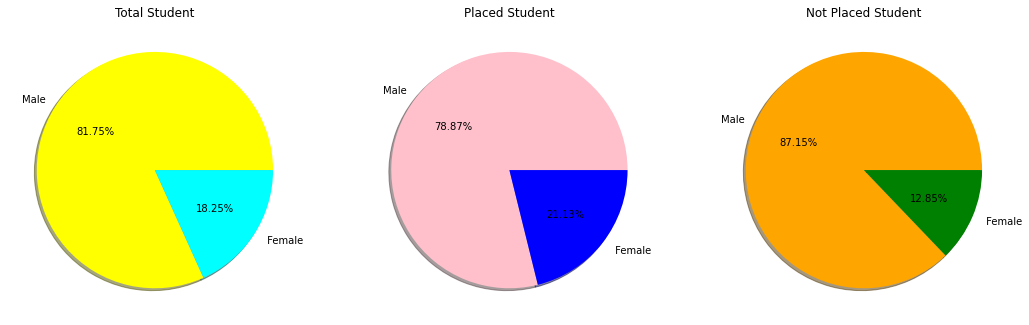

In [258]:
placed=df[df["PlacementStatus"]=="placed"]
N_placed=df[df["PlacementStatus"]=="Unplaced"]
fig=plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
plt.pie(df["Gender"].value_counts(),labels={"Male"," Female"},colors={"cyan", "yellow"},
        shadow=True,autopct = '%.2f%%')
plt.title("Total Student")
plt.subplot(1,3,2)
plt.pie(placed["Gender"].value_counts(),labels={"Male"," Female"},colors={"blue", "pink"},
        shadow=True,autopct = '%.2f%%')
plt.title("Placed Student")
plt.subplot(1,3,3)
plt.pie(N_placed["Gender"].value_counts(),labels={"Male"," Female"},colors={"green", "orange"},
        shadow=True,autopct = '%.2f%%')
plt.title("Not Placed Student")